In [1]:
import pandas as pd
import plotly.express as px


In [6]:
!pip install prophet



     ---------------------------------------- 12.1/12.1 MB 1.7 MB/s eta 0:00:00
  Using cached holidays-0.18-py3-none-any.whl (195 kB)
     ---------------------------------------- 81.2/81.2 kB 2.3 MB/s eta 0:00:00
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
  Using cached ephem-4.1.4-cp310-cp310-win_amd64.whl (1.4 MB)
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=838e8afa6c4dc8712469f2969fb3a249a4611eaff2f5a45b5209d306136294ec
  Stored in directory: c:\users\purna\appdata\local\pip\cache\wheels\d6\67\78\aa2e8d108639dd23a5e9e72a4fc

In [8]:
from prophet import Prophet

In [ ]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

In [7]:
!pip install autoscraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Automating data Collection

In [8]:
from autoscraper import AutoScraper
import requests
from bs4 import BeautifulSoup
import pandas as pd

scraper = AutoScraper()

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup

In [9]:
stock = input("Enter Stock Ticker : ")

Enter Stock Ticker : TCS


In [10]:
url = "https://finance.yahoo.com/quote/"+stock+"/history?p="+stock

req = Request(url , headers={'User-Agent': 'Mozilla/5.0'})

webpage = urlopen(req).read()
page_soup = soup(webpage, "html.parser")

In [11]:
extract_link = page_soup.find("div", class_ = "YDC-Col1 Bdendc(t) Bdendw(340px) tablet_Bdendw(0)--noRightRail Bdends(s) Mt(17px) Pos(r) Z(1)").find("div", class_ = "C($tertiaryColor) Mt(20px) Mb(15px)").find("a")

In [12]:
link = extract_link.get("href")

## Importing Data

In [13]:
data = pd.read_csv(link)

In [14]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-04,11.21,11.53,11.15,11.46,11.46,987400
1,2022-01-05,11.49,11.49,10.92,10.99,10.99,944100
2,2022-01-06,11.26,11.58,11.02,11.35,11.35,633500
3,2022-01-07,11.30,11.55,11.09,11.20,11.20,515700
4,2022-01-10,11.07,11.08,10.77,10.86,10.86,756100
...,...,...,...,...,...,...,...
246,2022-12-27,4.23,4.26,4.14,4.21,4.21,319200
247,2022-12-28,4.17,4.30,4.13,4.15,4.15,239500
248,2022-12-29,4.15,4.35,4.11,4.30,4.30,249400
249,2022-12-30,4.21,4.40,4.20,4.31,4.31,447700


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,7.066375,7.232351,6.897291,7.052470,7.052470,5.290865e+05
std,1.744764,1.776481,1.711122,1.745733,1.745733,4.972675e+05
min,4.060000,4.230000,3.890000,4.090000,4.090000,1.124000e+05
25%,5.340000,5.530000,5.260000,5.395000,5.395000,3.099000e+05
50%,7.280000,7.410000,7.110000,7.210000,7.210000,4.377000e+05
75%,8.085000,8.280000,7.920000,8.085000,8.085000,6.309500e+05
max,11.490000,11.580000,11.150000,11.460000,11.460000,6.846200e+06


# Data Visualization

In [17]:
px.area(data, x = "Date", y = "Close")

In [18]:
px.line(data, x = "Date", y = "Close")

In [19]:
px.area(data, x = "Date", y = "Volume")

In [20]:
px.bar(data, y = "Volume")

In [21]:
 # Box Plot

px.box(data, y = "Close")

# FaceBook Prophet
- A Forecasting Tools for trends and seasonal influence

# Data Preparation

In [22]:
columns = ["Date", "Close"]

new_df = pd.DataFrame(data, columns=columns)

In [23]:
new_df

,Date,Close
0,2022-01-04,11.46
1,2022-01-05,10.99
2,2022-01-06,11.35
3,2022-01-07,11.20
4,2022-01-10,10.86
...,...,...
246,2022-12-27,4.21
247,2022-12-28,4.15
248,2022-12-29,4.30
249,2022-12-30,4.31


In [24]:
prophet_df = new_df.rename(columns= {"Date":"ds", "Close":"y"})

In [25]:
prophet_df

,ds,y
0,2022-01-04,11.46
1,2022-01-05,10.99
2,2022-01-06,11.35
3,2022-01-07,11.20
4,2022-01-10,10.86
...,...,...
246,2022-12-27,4.21
247,2022-12-28,4.15
248,2022-12-29,4.30
249,2022-12-30,4.31


# Creating Model

In [26]:
m = Prophet()

m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecasting

In [27]:
n = int(input("Enter number of days : "))

Enter number of days : 5


In [28]:
next = m.make_future_dataframe(periods=10)  #here n days a considered as our data is daily data

forecast = m.predict(next)

In [29]:
fore = forecast.tail(10)

In [30]:
fore.style.hide_index()

ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2023-01-04 00:00:00,4.192404,3.607005,4.519977,4.192404,4.192404,-0.122508,-0.122508,-0.122508,-0.122508,-0.122508,-0.122508,0.000000,0.000000,0.000000,4.069896
2023-01-05 00:00:00,4.178232,3.617937,4.578825,4.178232,4.178232,-0.096336,-0.096336,-0.096336,-0.096336,-0.096336,-0.096336,0.000000,0.000000,0.000000,4.081896
2023-01-06 00:00:00,4.164059,3.599767,4.508469,4.163986,4.164155,-0.083569,-0.083569,-0.083569,-0.083569,-0.083569,-0.083569,0.000000,0.000000,0.000000,4.080490
2023-01-07 00:00:00,4.149887,3.861211,4.835749,4.148817,4.151302,0.184142,0.184142,0.184142,0.184142,0.184142,0.184142,0.000000,0.000000,0.000000,4.334029
2023-01-08 00:00:00,4.135714,3.870525,4.762289,4.132810,4.138698,0.184142,0.184142,0.184142,0.184142,0.184142,0.184142,0.000000,0.000000,0.000000,4.319857
2023-01-09 00:00:00,4.121542,3.634519,4.557084,4.116548,4.126955,-0.033280,-0.033280,-0.033280,-0.033280,-0.033280,-0.033280,0.000000,0.000000,0.000000,4.088262
2023-01-10 00:00:00,4.107370,3.585580,4.553544,4.099786,4.114697,-0.032592,-0.032592,-0.032592,-0.032592,-0.032592,-0.032592,0.000000,0.000000,0.000000,4.074777
2023-01-11 00:00:00,4.093197,3.475953,4.456468,4.081928,4.103097,-0.122508,-0.122508,-0.122508,-0.122508,-0.122508,-0.122508,0.000000,0.000000,0.000000,3.970690
2023-01-12 00:00:00,4.079025,3.509499,4.441855,4.063948,4.092570,-0.096336,-0.096336,-0.096336,-0.096336,-0.096336,-0.096336,0.000000,0.000000,0.000000,3.982689
2023-01-13 00:00:00,4.064852,3.515937,4.462397,4.047194,4.082262,-0.083569,-0.083569,-0.083569,-0.083569,-0.083569,-0.083569,0.000000,0.000000,0.000000,3.981284


In [31]:


# Visualizing the predicted data

px.line(forecast, x = "ds", y = "yhat")

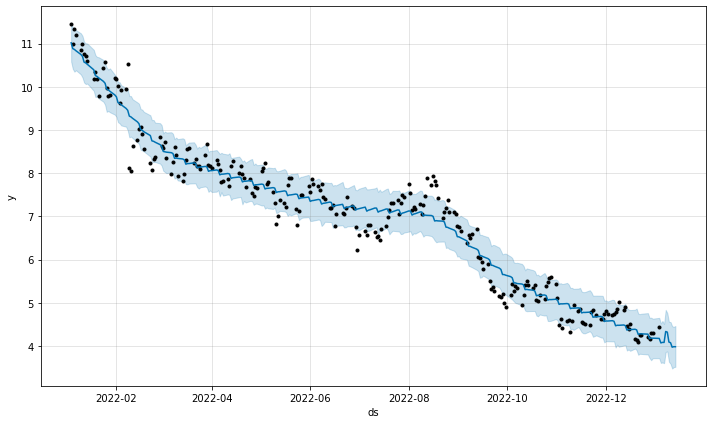

In [32]:
# Create Visualizations

figure = m.plot(forecast, xlabel = "ds", ylabel = "y")

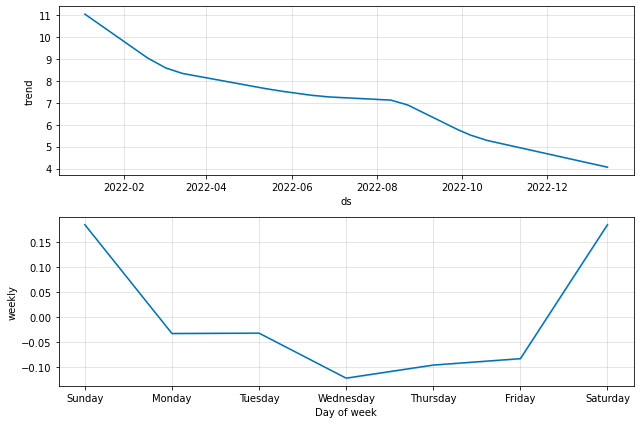

In [33]:
fig2 = m.plot_components(forecast)

# Downloading Forecast Data

In [34]:
from google.colab import files

forecast.tail(10).to_csv("forecast_TECHM.csv")

In [35]:
files.download("forecast_TECHM.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>